## Unit 39 - Financial Data Analysis Mini Project

In [34]:
# Step 1 - Let's prepare for data acquisition and create data acquisition functions
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas_datareader.data as web

from datetime import date, datetime, time, timezone

In [49]:
# A Function that obtains the stock price for a given stock when the ticker code is input
def get_stock_data(ticker, start, end):
    data = web.DataReader(ticker, 'yahoo', start=start, end=end)
    data.insert(0, "Ticker", ticker)
    return data

In [51]:
# to test whether data data acquisition work properly, enter Disney's ticker code to test the function
ticker = 'DIS'
start = datetime(2020, 1, 1)
end = datetime.today()

In [ ]:
d = get_stock_data(ticker, start, end)
d.head()

In [94]:
import yfinance as yf
from datetime import datetime

def get_stock_data(ticker, start, end):
    try:
        data = yf.download(ticker, start=start, end=end)
        # print(data.head())  # Print the first few rows of data to understand its structure
        data.insert(0, "Ticker", ticker)
        return data
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

# Example usage
ticker = "DIS"
start = datetime(2020, 1, 1)
end = datetime.today()

stock_data = get_stock_data(ticker, start, end)

if stock_data is not None:
    print(stock_data.head())
else:
    print("Failed to fetch stock data.")

[*********************100%%**********************]  1 of 1 completed
           Ticker        Open        High         Low       Close   Adj Close  \
Date                                                                            
2020-01-02    DIS  145.289993  148.199997  145.100006  148.199997  147.718567   
2020-01-03    DIS  146.399994  147.899994  146.050003  146.500000  146.024094   
2020-01-06    DIS  145.539993  146.029999  144.309998  145.649994  145.176849   
2020-01-07    DIS  145.990005  146.869995  145.419998  145.699997  145.226685   
2020-01-08    DIS  145.490005  146.130005  144.820007  145.399994  144.927658   

             Volume  
Date                 
2020-01-02  9502100  
2020-01-03  7320200  
2020-01-06  8262500  
2020-01-07  6906500  
2020-01-08  6984200  


In [85]:
stock_data = stock_data.pivot(index = None, columns = "Ticker", values = "Close")
stock_data.head()

Ticker,DIS
Date,
2020-01-02,148.199997
2020-01-03,146.500000
2020-01-06,145.649994
2020-01-07,145.699997
2020-01-08,145.399994


In [86]:
SPY = get_stock_data("SPY", start, end)
IYW = get_stock_data("IYW", start, end)
VT = get_stock_data("VT", start, end)
DBA = get_stock_data("DBA", start, end)
TLT = get_stock_data("TLT", start, end)
PDBC = get_stock_data("PDBC", start, end)
IAU = get_stock_data("IAU", start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [87]:
SPY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1010 entries, 2020-01-02 to 2024-01-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     1010 non-null   object 
 1   Open       1010 non-null   float64
 2   High       1010 non-null   float64
 3   Low        1010 non-null   float64
 4   Close      1010 non-null   float64
 5   Adj Close  1010 non-null   float64
 6   Volume     1010 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 63.1+ KB


In [88]:
# Executing pivot per data frame
SPY = SPY.pivot(index = None, columns = "Ticker", values = "Close")
IYW = IYW.pivot(index = None, columns = "Ticker", values = "Close")
VT = VT.pivot(index = None, columns = "Ticker", values = "Close")
DBA = DBA.pivot(index = None, columns = "Ticker", values = "Close")
TLT = TLT.pivot(index = None, columns = "Ticker", values = "Close")
PDBC = PDBC.pivot(index = None, columns = "Ticker", values = "Close")
IAU = IAU.pivot(index = None, columns = "Ticker", values = "Close")

In [89]:
# Step 2 - Each created data frame is combined into one data frame for efficient analysis
stock = pd.concat([SPY, IYW, VT, DBA, TLT, PDBC, IAU,], axis = 1, join = 'outer')
stock.head()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,324.869995,59.355000,81.809998,16.500000,137.009995,16.639999,29.219999
2020-01-03,322.410004,58.762501,81.070000,16.309999,139.119995,16.780001,29.620001
2020-01-06,323.640015,59.125000,81.370003,16.350000,138.330002,16.799999,29.920000
2020-01-07,322.730011,59.147499,81.120003,16.389999,137.649994,16.770000,30.040001
2020-01-08,324.450012,59.737499,81.449997,16.309999,136.740005,16.540001,29.820000


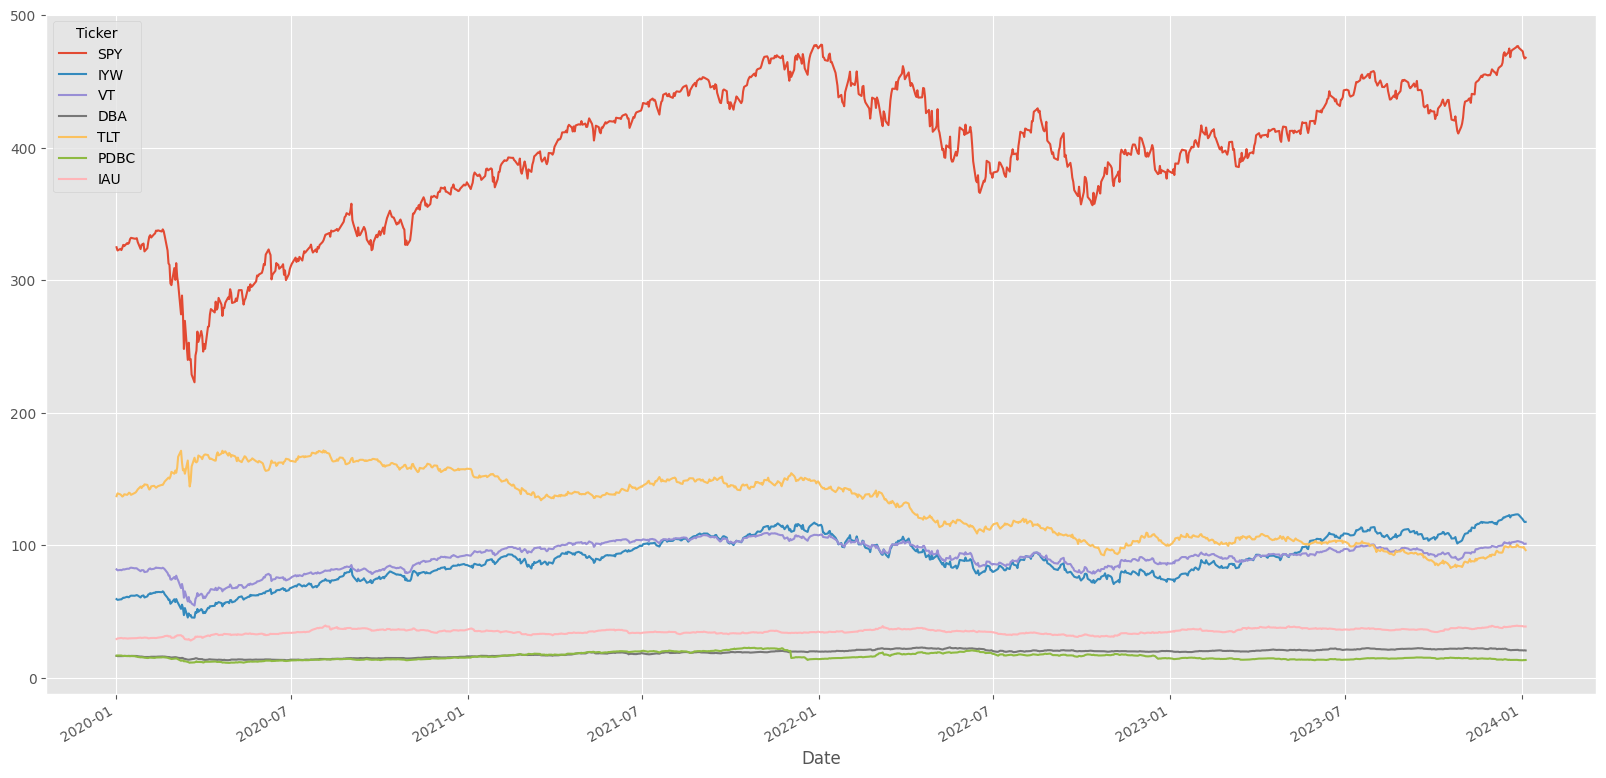

In [90]:
# Step 3 - if you draw a graph based on the closing price data on time series basis(date), you can check the stock price movement. By overlapping the graphs of each ticker, you can see the approximate correlation.
plt.style.use('ggplot')
stock.plot(figsize = (20, 10))
plt.show()

In [95]:
covid = stock['2020-2-1':'2020-7-31']

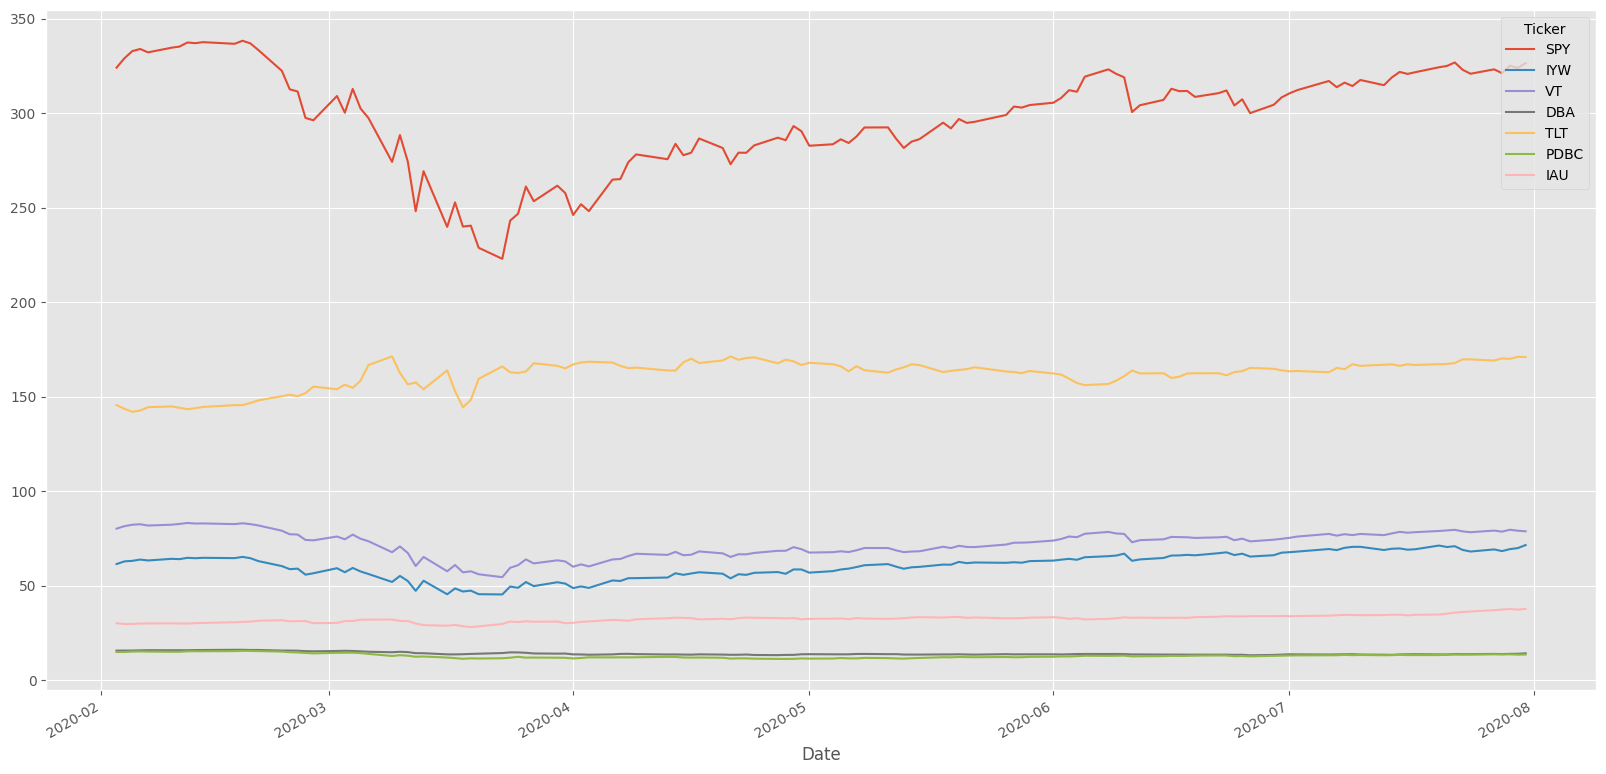

In [97]:
plt.style.use('ggplot')
covid.plot(figsize=(20, 10))
plt.show()

In [98]:
# Seperate the relevant period factors to check the graph
x = covid.index
s_y = covid[['SPY']]
i_y = covid[['IAU']]
d_y = covid[['DBA']]
t_y = covid[['TLT']]

Text(0.5, 0.98, 'Covid 19')

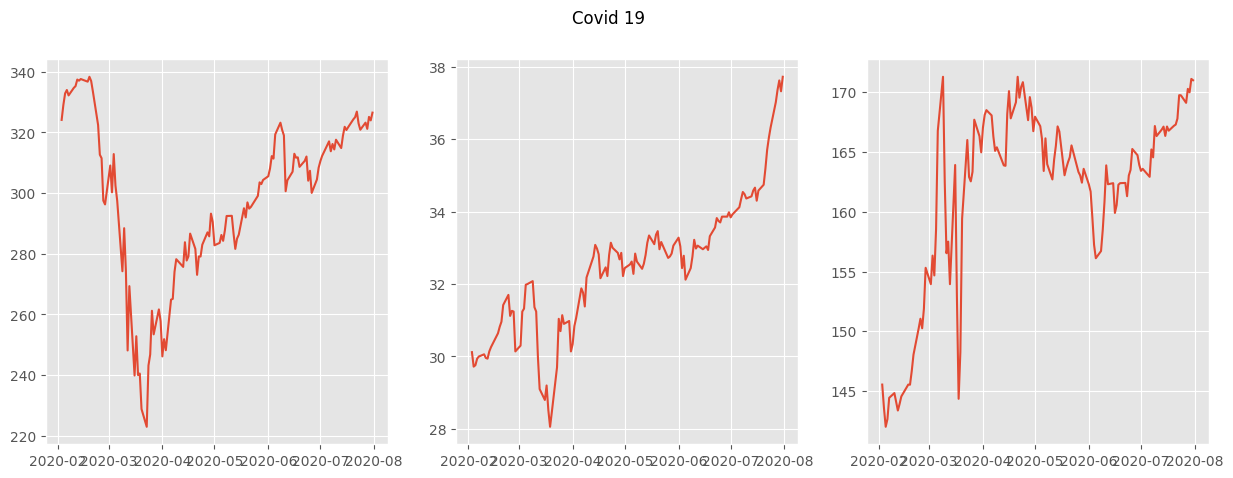

In [104]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize = (15, 5))
axs[0].plot(x, s_y)
axs[1].plot(x, i_y)
axs[2].plot(x, t_y)

fig.suptitle('Covid 19')

In [106]:
# Step 4 - Let's visualize the trading volume data in the form of a bar graph for a specific ticker.
import yfinance as yf
from datetime import datetime

def get_stock_data(ticker, start, end):
    try:
        data = yf.download(ticker, start=start, end=end)
        # print(data.head())  # Print the first few rows of data to understand its structure
        data.insert(0, "Ticker", ticker)
        return data
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

# Example usage
ticker = "PDBC"
start = datetime(2020, 1, 1)
end = datetime.today()

df = get_stock_data(ticker, start, end)

if df is not None:
    print(df.head())
else:
    print("Failed to fetch stock data.")

[*********************100%%**********************]  1 of 1 completed
           Ticker       Open       High        Low      Close  Adj Close  \
Date                                                                       
2020-01-02   PDBC  16.570000  16.670000  16.520000  16.639999   9.154050   
2020-01-03   PDBC  16.809999  16.840000  16.709999  16.780001   9.231069   
2020-01-06   PDBC  16.900000  16.910000  16.770000  16.799999   9.242070   
2020-01-07   PDBC  16.750000  16.799999  16.716999  16.770000   9.225567   
2020-01-08   PDBC  16.770000  16.770000  16.363001  16.540001   9.099039   

             Volume  
Date                 
2020-01-02  4004600  
2020-01-03   760200  
2020-01-06  1608700  
2020-01-07  1723200  
2020-01-08   923300  


In [107]:
# Delete all except the volume column.
df.drop(['Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close'], axis = 1, inplace = True)

In [108]:
df.head()

,Volume
Date,
2020-01-02,4004600
2020-01-03,760200
2020-01-06,1608700
2020-01-07,1723200
2020-01-08,923300


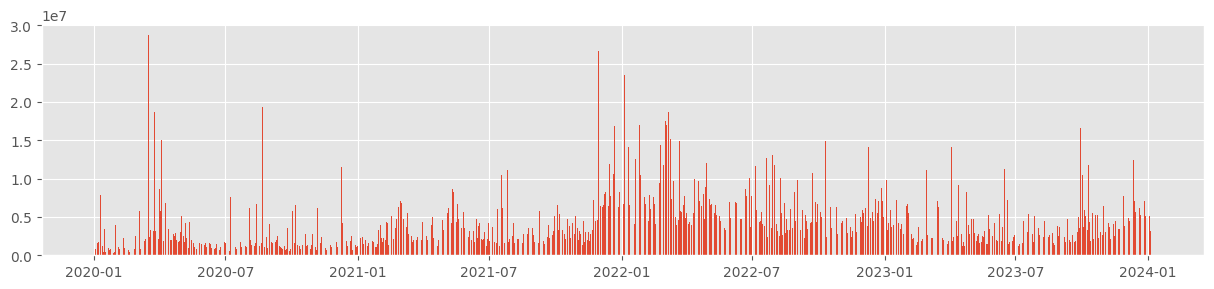

In [110]:
x = df.index
y = df['Volume']
plt.figure(figsize = (15, 3))
plt.bar(x, y)
plt.show()

In [117]:
ticker = "PDBC"
start = datetime(2020, 1, 1)
end = datetime.today()

df = get_stock_data(ticker, start, end)

if df is not None:
    print(df.head())
else:
    print("Failed to fetch stock data.")

[*********************100%%**********************]  1 of 1 completed
           Ticker       Open       High        Low      Close  Adj Close  \
Date                                                                       
2020-01-02   PDBC  16.570000  16.670000  16.520000  16.639999   9.154051   
2020-01-03   PDBC  16.809999  16.840000  16.709999  16.780001   9.231069   
2020-01-06   PDBC  16.900000  16.910000  16.770000  16.799999   9.242070   
2020-01-07   PDBC  16.750000  16.799999  16.716999  16.770000   9.225568   
2020-01-08   PDBC  16.770000  16.770000  16.363001  16.540001   9.099039   

             Volume  
Date                 
2020-01-02  4004600  
2020-01-03   760200  
2020-01-06  1608700  
2020-01-07  1723200  
2020-01-08   923300  


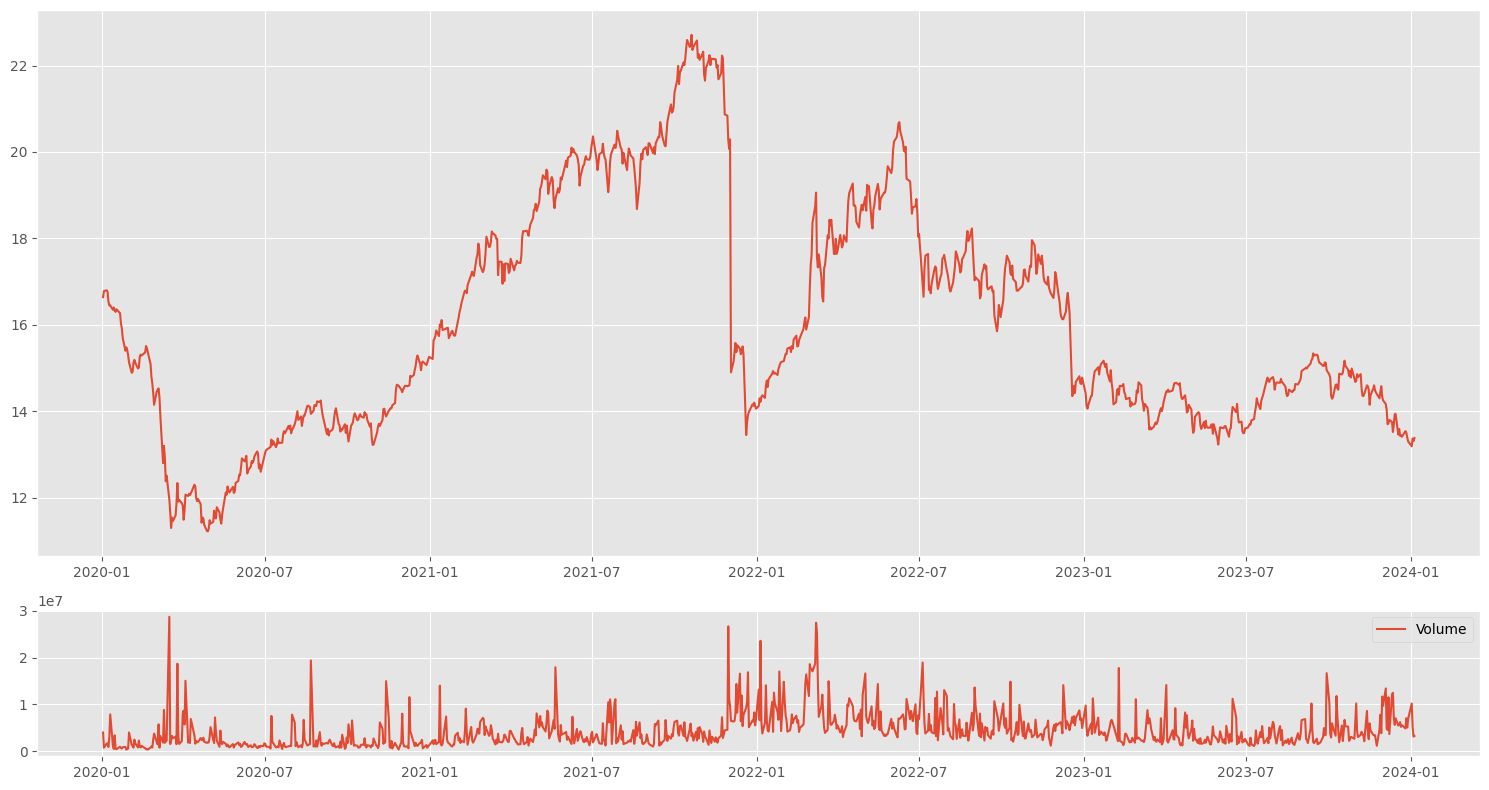

In [121]:
# Step 5 - Using matplotlib's subplot2grid, the graph of the closing price is visualized in the upper layout and the training volume in the same period is visualized in the lower layout.
fig = plt.figure(figsize = (15, 8))

top_grid = plt.subplot2grid((4, 4), (0, 0), rowspan = 3, colspan = 4)
bottom_grid = plt.subplot2grid((4, 4), (3, 0), rowspan = 1, colspan = 4)

top_grid.plot(df.index, df['Close'], label = 'Close')
bottom_grid.plot(df.index, df['Volume'], label = 'Volume')

plt.tight_layout()

plt.legend()
plt.show()